## Which is greater, $\pi^e$ or $e^\pi$?

In this notebook, we explore the values of $\pi^e$ and $e^\pi$. In particular, we implement derivatives to show which value is greatest. Now, we can easily see what the answer should be using some simple python:

In [1]:
import numpy as np

# Defining pi and e values
pi = np.pi
e = np.e

print(f"pi^e is {pi**e:.2f} and e^pi is {e**pi:.2f}.")

pi^e is 22.46 and e^pi is 23.14.


We see that $e^\pi > \pi^e$. However, how can we show this using calculus? I present an approach here.

### (1) $f(x) =1/x$

Let $f: \mathbb{R}^+ \to \mathbb{R}^+$ be defined by $f(x) = 1/x$. We can see what this looks like in the following figure

In [2]:
# Importing style for site
import style

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Creating our domain
x = np.linspace(0, 4, 1000)

# Avoiding division by zero
x = x[x != 0]

# Computing f(x)
y = 1 / x

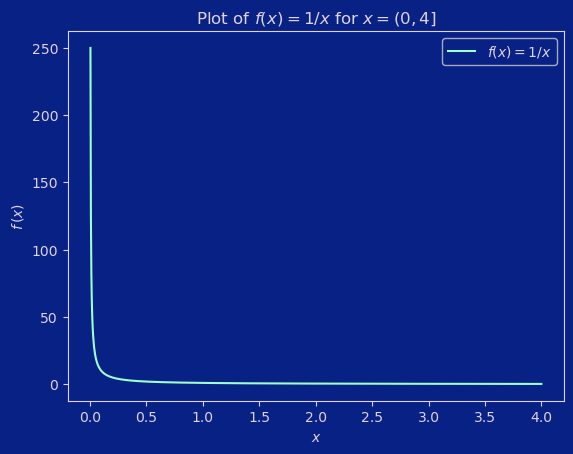

In [4]:
# Setting style
plt.rcParams.update(style.style)

# Plotting f(x)
plt.plot(x, y, label=r"$f(x) = 1/x$")

plt.xlabel(r"$x$")
plt.ylabel(r"$f\,(x)$")
plt.title(r"Plot of $f(x) = 1/x$ for $x = (0, 4]$")

plt.legend()

plt.show()

Let us now zoom in a bit to the values we're focused on, $e$ and $\pi$:

In [5]:
# Making new domain, evenly spaced
delta = .25
x = np.linspace(e - delta, pi + delta, 1000)

# Computing new f(x)
y = 1 / x

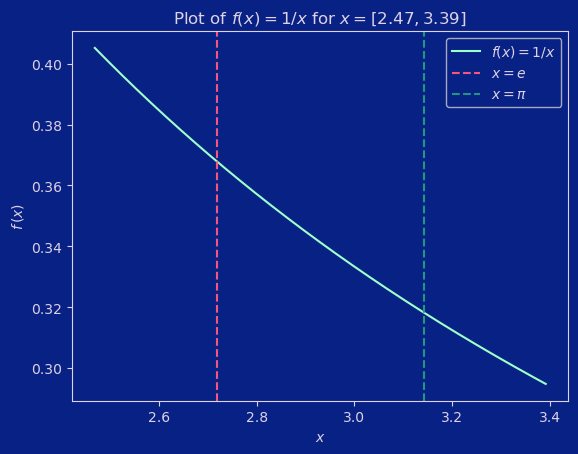

In [6]:
plt.plot(x, y, label=r"$f(x) = 1/x$")

# Add vertical lines at e and pi
plt.axvline(x=e, color="#F7567C", linestyle='--', label=r'$x = e$')
plt.axvline(x=pi, color="#23967F", linestyle='--', label=f'$x = \pi$')

plt.xlabel(r"$x$")
plt.ylabel(r"$f\,(x)$")
plt.title(fr"Plot of $f(x) = 1/x$ for $x = [{x[0]: .2f}, {x[-1]: .2f}]$")

plt.legend()

plt.show()

Now, in this zoomed in figure, let us consider two different shaded regions. The first region will be the integral of $f(x)$ bounded by $e$ and $\pi$: $$\int_e^\pi\frac{dx}{x}.$$ The second region to consider is the rectangle with vertices at $\left\{\left(e, 0\right), \left(e, f(e)\right), \left(\pi, f(e)\right), \left(\pi, 0\right)\right\}$. We see a visual of these regions in the following figure.

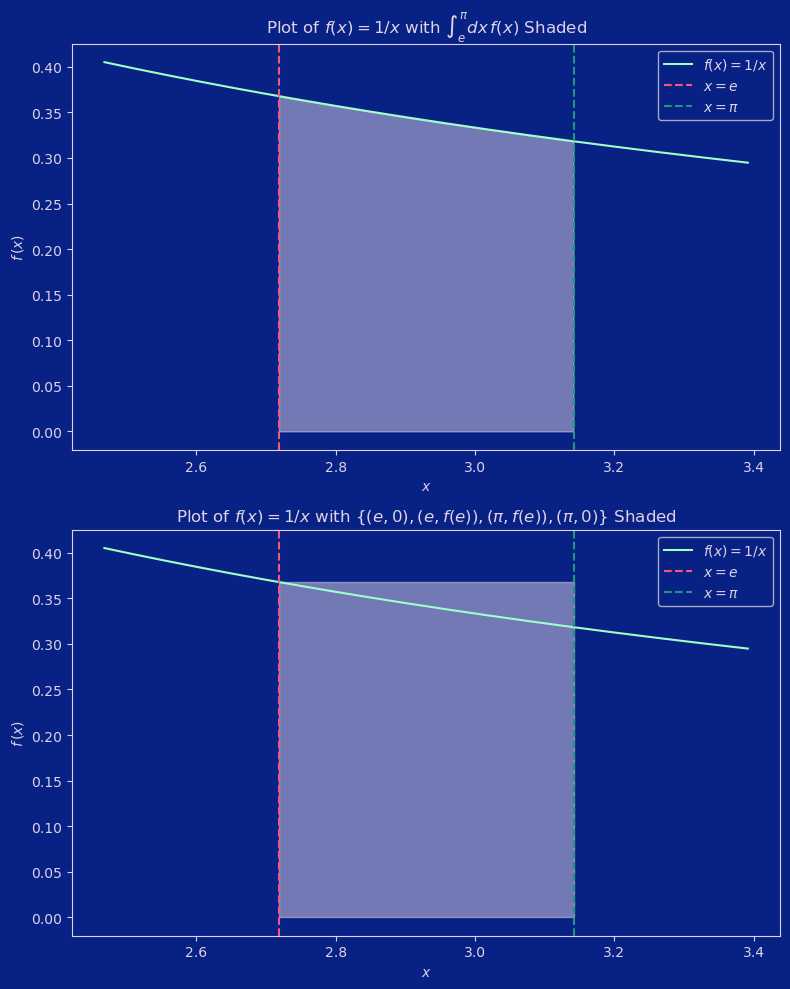

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot on the first subplot (ax1) - Shaded integral region
ax1.plot(x, y, label=r"$f(x) = 1/x$")
ax1.axvline(x=e, color="#F7567C", linestyle='--', label=r'$x = e$')
ax1.axvline(x=pi, color="#23967F", linestyle='--', label=r'$x = \pi$')
ax1.fill_between(x, y, where=(x >= e) & (x <= pi), color='#DFD2E7', alpha=0.5)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$f\,(x)$")
ax1.set_title(r"Plot of $f(x) = 1/x$ with $\int_e^\pi dx\, f(x)$ Shaded")
ax1.legend()

# Plot on the second subplot (ax2) - Filled rectangle
ax2.plot(x, y, label=r"$f(x) = 1/x$")
ax2.axvline(x=e, color="#F7567C", linestyle='--', label=r'$x = e$')
ax2.axvline(x=pi, color="#23967F", linestyle='--', label=r'$x = \pi$')
ax2.fill_betweenx([0, 1/e], e, pi, color='#DFD2E7', alpha=0.5)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$f\,(x)$")
ax2.set_title(r"Plot of $f(x) = 1/x$ with $\left\{\left(e, 0\right), \left(e, f(e)\right), \left(\pi, f(e)\right), \left(\pi, 0\right)\right\}$ Shaded")
ax2.legend()

# Adjust layout
plt.tight_layout()

plt.show()

Solving the integral defined above yields the area of the first region: $$\int_e^\pi\frac{dx}{x} = \left.\ln{x}\right|_e^\pi = \ln{\pi} - 1.$$ The area of the rectangular region is given by $$f(e)\cdot\left(\pi - e\right) = \frac{1}{e}\cdot\left(\pi - e\right) = \frac{\pi}{e} - 1.$$ Now, from the figure above we can clearly see that the area of the rectangular region is greater than the area given by the integral, so 
\begin{gather*}
    \frac{\pi}{e} - 1 > \ln{\pi} - 1 \\
    \frac{\pi}{e} > \ln{\pi} \\
    e^{\pi/e} > \pi \\
    e^\pi > \pi^e.
\end{gather*}